In [1]:
import pandas as pd
import yaml
from AdNoise import AdversarialNoise

In [2]:
labels_df = pd.read_csv("./data/input/imagenet_labels.csv")
labels_df.head(20)

,label_digit,label_text
0,0,"tench, Tinca tinca"
1,1,"goldfish, Carassius auratus"
2,2,"great white shark, white shark, man-eater, man..."
3,3,"tiger shark, Galeocerdo cuvieri"
4,4,"hammerhead, hammerhead shark"
5,5,"electric ray, crampfish, numbfish, torpedo"
6,6,stingray
7,7,cock
8,8,hen
9,9,"ostrich, Struthio camelus"


In [7]:
params = yaml.load(open('./AdNoise/config.yaml', 'r'), Loader=yaml.FullLoader)
params['directories']['labels'] = './data/input/imagenet_labels.csv'
params['directories']['output'] = './data/output/'
image_path = './data/input/n01491361_tiger_shark.jpeg'
label = 'robin' # label must be from the imagenet labels

/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2024-07-12 20:10:56,012 - Reading image
2024-07-12 20:10:56,013 - Image found, displaying input image


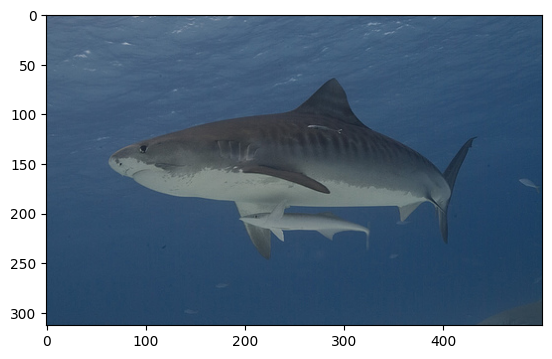

2024-07-12 20:10:56,143 - Computing gradient
2024-07-12 20:10:56,245 - Cross Entropy Loss: 10.468286514282227
2024-07-12 20:10:56,246 - Specified target: 15 - robin, American robin, Turdus migratorius
2024-07-12 20:10:56,246 - Prediction: 3 - tiger shark, Galeocerdo cuvieri
2024-07-12 20:10:56,435 - Perturbing image with PGD attack
2024-07-12 20:10:56,436 - ====================================================
100%|██████████| 10/10 [00:02<00:00,  4.50it/s]
2024-07-12 20:10:58,724 - Cross Entropy Loss after perturbation: 0.5271261930465698
2024-07-12 20:10:58,725 - Prediction after perturbation: 15 - robin, American robin, Turdus migratorius
2024-07-12 20:10:58,735 - Saving perturbed image


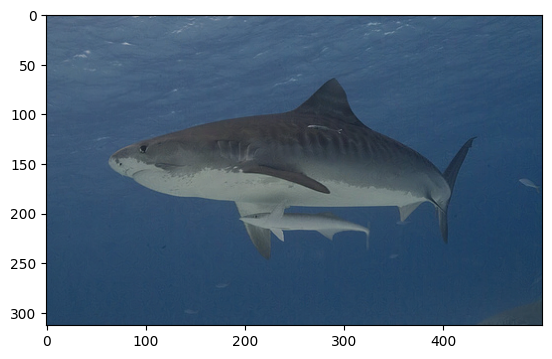

In [8]:
noise = AdversarialNoise(params, image_path, label)
noise.run(show_image=True)

Results for the BIM and PGD are exactly same for number of iterations = 10. As the number of iterations increase the results will vary.